In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

## RESULTS USING THE SIGNAL OF DONE

In [2]:
env='MountainCarContinuous-v0'
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
print(df_comper.shape)

(30248, 17)


In [3]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data_using_truncate/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
print(df_ddpg.shape)

(1500, 17)


In [4]:
df_comper.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,MountainCarContinuous-v0,28-07-2023 15:14:04,200,0,166,0.009941,1,201,False,-1.470786,-1.470786,-1.470786,-1.470786,-1.470786,COMPER
1,1,2,MountainCarContinuous-v0,28-07-2023 15:19:26,400,0,311,0.019882,1,401,False,-1.984202,-1.727494,-1.727494,-1.727494,-1.727494,COMPER
2,1,3,MountainCarContinuous-v0,28-07-2023 15:24:52,600,0,455,0.029822,1,601,False,-5.005238,-2.820076,-2.820076,-2.820076,-2.820076,COMPER
3,1,4,MountainCarContinuous-v0,28-07-2023 15:30:27,800,0,592,0.039763,1,801,False,-7.342238,-3.950616,-3.950616,-3.950616,-3.950616,COMPER
4,1,5,MountainCarContinuous-v0,28-07-2023 15:35:55,999,0,769,0.049654,1,1000,True,-8.396679,-4.839829,-4.839829,-4.839829,-4.839829,COMPER


In [5]:
df_ddpg.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,MountainCarContinuous-v0,20-07-2023 13:50:54,200,127,0,0.009941,1,201,False,-2.350934,-2.350934,-2.350934,-2.350934,-2.350934,DDPG
1,1,2,MountainCarContinuous-v0,20-07-2023 13:51:11,400,206,0,0.019882,1,401,False,-3.499505,-2.925220,-2.925220,-2.925220,-2.925220,DDPG
2,1,3,MountainCarContinuous-v0,20-07-2023 13:51:29,600,301,0,0.029822,1,601,False,-6.686414,-4.178951,-4.178951,-4.178951,-4.178951,DDPG
3,1,4,MountainCarContinuous-v0,20-07-2023 13:51:47,800,358,0,0.039763,1,801,False,-7.524165,-5.015255,-5.015255,-5.015255,-5.015255,DDPG
4,1,5,MountainCarContinuous-v0,20-07-2023 13:52:04,999,445,0,0.049654,1,1000,True,-8.279169,-5.668037,-5.668037,-5.668037,-5.668037,DDPG


In [6]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,MountainCarContinuous-v0,28-07-2023 15:14:04,200,0,166,0.009941,1,201,False,-1.470786,-1.470786,-1.470786,-1.470786,-1.470786,COMPER
1,1,2,MountainCarContinuous-v0,28-07-2023 15:19:26,400,0,311,0.019882,1,401,False,-1.984202,-1.727494,-1.727494,-1.727494,-1.727494,COMPER
2,1,3,MountainCarContinuous-v0,28-07-2023 15:24:52,600,0,455,0.029822,1,601,False,-5.005238,-2.820076,-2.820076,-2.820076,-2.820076,COMPER
3,1,4,MountainCarContinuous-v0,28-07-2023 15:30:27,800,0,592,0.039763,1,801,False,-7.342238,-3.950616,-3.950616,-3.950616,-3.950616,COMPER
4,1,5,MountainCarContinuous-v0,28-07-2023 15:35:55,999,0,769,0.049654,1,1000,True,-8.396679,-4.839829,-4.839829,-4.839829,-4.839829,COMPER


In [7]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
295,5,296,MountainCarContinuous-v0,20-07-2023 20:05:21,49400,14217,0,0.999,50,450,False,-8.638385,-6.666171,-5.849600,-7.227974,-3.613400,DDPG
296,5,297,MountainCarContinuous-v0,20-07-2023 20:05:39,49600,14221,0,0.999,50,650,False,-9.134983,-6.674483,-5.784190,-7.323435,-3.983465,DDPG
297,5,298,MountainCarContinuous-v0,20-07-2023 20:05:58,49800,14240,0,0.999,50,850,False,-10.596937,-6.687646,-5.887863,-7.396878,-5.037305,DDPG
298,5,299,MountainCarContinuous-v0,20-07-2023 20:06:12,49950,14249,0,0.999,50,1000,True,-11.254493,-6.702920,-5.990816,-7.474999,-6.136666,DDPG
299,5,300,MountainCarContinuous-v0,20-07-2023 20:06:17,50000,14249,0,0.999,51,51,True,-0.106347,-6.680931,-5.965931,-7.326414,-6.050669,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

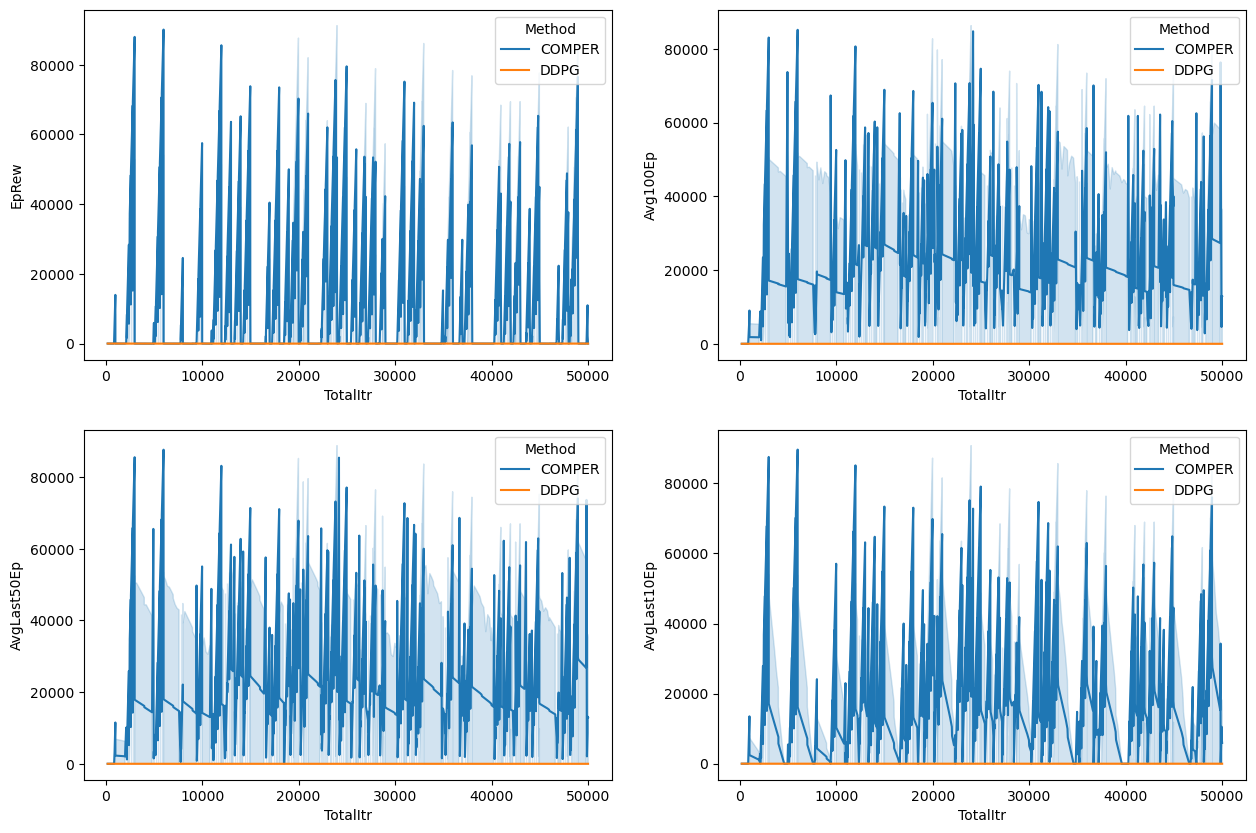

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


In [9]:
path ='COMPER_DDPG/data_using_truncate/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,28-07-2023 17:26:51,MountainCarContinuous-v0,5000,-0.461284,COMPER
1,1,28-07-2023 19:44:17,MountainCarContinuous-v0,10000,-0.549898,COMPER
2,1,28-07-2023 22:02:48,MountainCarContinuous-v0,15000,-0.549778,COMPER
3,1,29-07-2023 00:20:21,MountainCarContinuous-v0,20000,-0.549870,COMPER
4,1,29-07-2023 02:34:44,MountainCarContinuous-v0,25000,-0.018828,COMPER


In [10]:
path ='DPPG/data_using_truncate/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,20-07-2023 13:57:55,MountainCarContinuous-v0,5000,-0.000244,DDPG
1,1,20-07-2023 14:05:15,MountainCarContinuous-v0,10000,-0.001033,DDPG
2,1,20-07-2023 14:12:40,MountainCarContinuous-v0,15000,-0.000002,DDPG
3,1,20-07-2023 14:20:06,MountainCarContinuous-v0,20000,-0.000123,DDPG
4,1,20-07-2023 14:27:34,MountainCarContinuous-v0,25000,-0.000004,DDPG


In [11]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

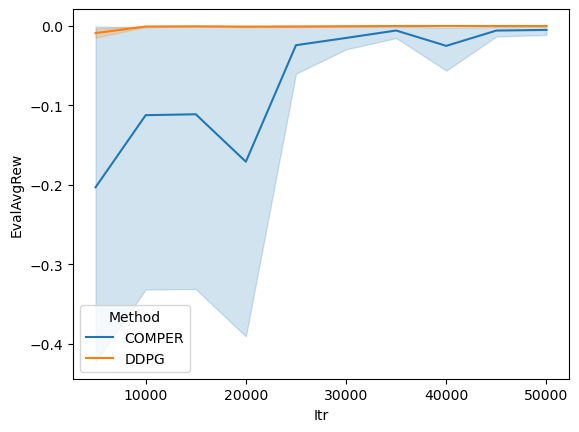

In [12]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')

## USING ROLLING AVERAGE

In [13]:
df_comper_rolling_avg = pd.DataFrame(df_comper[["TotalItr","EpRew","Method"]])
df_comper_rolling_avg["EpRewRolling"]=df_comper_rolling_avg['EpRew'].rolling(100).mean()
df_comper_rolling_avg.dropna(inplace=True)
df_comper_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,4000,-0.400000,COMPER,3141.868009
100,4200,-15.516359,COMPER,3141.727553
101,4400,-29.733758,COMPER,3141.450057
102,4600,-41.092735,COMPER,3141.089182
103,4800,-52.242154,COMPER,3140.640183


In [14]:
df_ddpg_rolling_avg=pd.DataFrame(df_ddpg[["TotalItr","EpRew","Method"]])
df_ddpg_rolling_avg["EpRewRolling"]=df_ddpg_rolling_avg["EpRew"].rolling(100).mean()
df_ddpg_rolling_avg.dropna(inplace=True)
df_ddpg_rolling_avg.head()

,TotalItr,EpRew,Method,EpRewRolling
99,16800,-41.241010,DDPG,-5.253955
100,16983,-45.586016,DDPG,-5.686306
101,17000,-0.524330,DDPG,-5.656554
102,17200,-8.212645,DDPG,-5.671817
103,17400,-14.189809,DDPG,-5.738473


In [15]:
df_rolling=pd.concat([df_comper_rolling_avg,df_ddpg_rolling_avg])
df_rolling.head()

,TotalItr,EpRew,Method,EpRewRolling
99,4000,-0.400000,COMPER,3141.868009
100,4200,-15.516359,COMPER,3141.727553
101,4400,-29.733758,COMPER,3141.450057
102,4600,-41.092735,COMPER,3141.089182
103,4800,-52.242154,COMPER,3140.640183


In [16]:
df_rolling.tail()

,TotalItr,EpRew,Method,EpRewRolling
295,49400,-8.638385,DDPG,-5.849600
296,49600,-9.134983,DDPG,-5.784190
297,49800,-10.596937,DDPG,-5.887863
298,49950,-11.254493,DDPG,-5.990816
299,50000,-0.106347,DDPG,-5.965931


<Axes: xlabel='TotalItr', ylabel='EpRewRolling'>

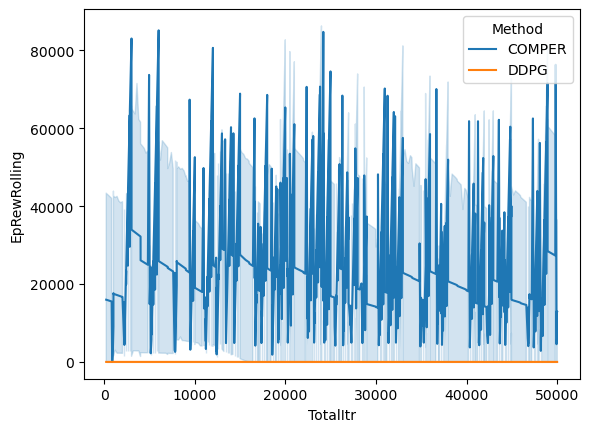

In [17]:
fig = plt.Figure()
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df_rolling, x="TotalItr", y="EpRewRolling",hue='Method')

In [18]:
df_comper_eval_rolling_avg = pd.DataFrame(df_comper_eval[["Int","EvalAvgRew","Method"]])
df_comper_eval_rolling_avg["EpRewRolling"]=df_comper_eval["EvalAvgRew"].rolling(2).mean()
df_comper_eval_rolling_avg.dropna(inplace=True)
df_comper_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.549898,COMPER,-0.505591
2,15000,-0.549778,COMPER,-0.549838
3,20000,-0.549870,COMPER,-0.549824
4,25000,-0.018828,COMPER,-0.284349
5,30000,-0.034315,COMPER,-0.026572


In [19]:
df_ddpg_eval_rolling_avg = pd.DataFrame(df_ddpg_eval[["Int","EvalAvgRew","Method"]])
df_ddpg_eval_rolling_avg["EpRewRolling"]=df_ddpg_eval["EvalAvgRew"].rolling(2).mean()
df_ddpg_eval_rolling_avg.dropna(inplace=True)
df_ddpg_eval_rolling_avg.head()

,Int,EvalAvgRew,Method,EpRewRolling
1,10000,-0.001033,DDPG,-0.000638
2,15000,-0.000002,DDPG,-0.000517
3,20000,-0.000123,DDPG,-0.000063
4,25000,-0.000004,DDPG,-0.000064
5,30000,-0.000052,DDPG,-0.000028


<Axes: xlabel='Int', ylabel='EpRewRolling'>

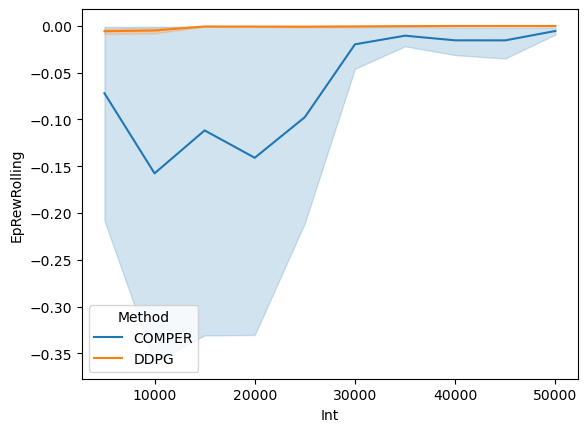

In [20]:
df_eval_rolling=pd.concat([df_comper_eval_rolling_avg,df_ddpg_eval_rolling_avg])
sns.lineplot(data=df_eval_rolling, x="Int", y="EpRewRolling",hue='Method')

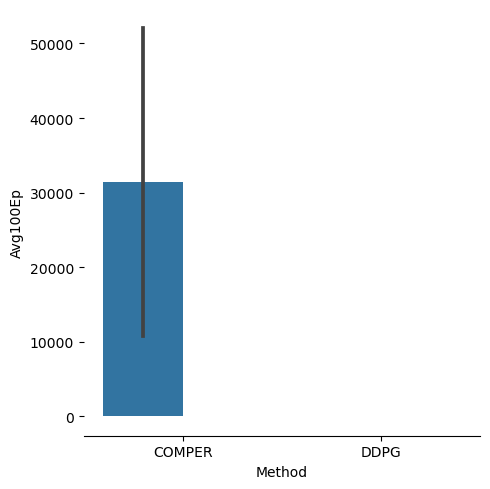

In [21]:
g = sns.catplot(data=df, kind="bar",x="Method", y="Avg100Ep", hue="Method",
    errorbar="sd")
g.despine(left=True)

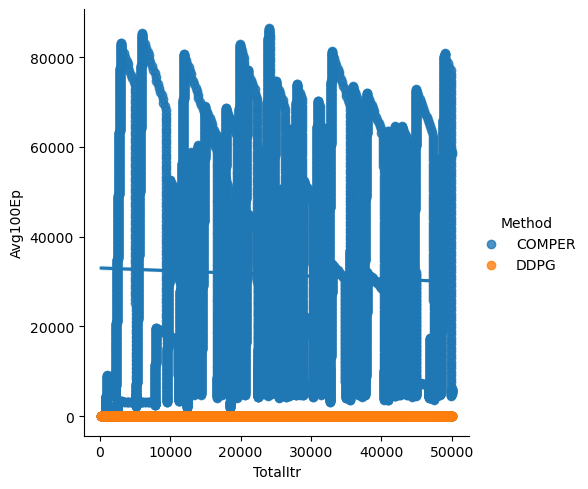

In [22]:
g = sns.lmplot(
    data=df,
    x="TotalItr", y="Avg100Ep", hue="Method",
    height=5
)